In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# Zadanie 2

In [33]:
def generate_data(N):
    # Definiowanie listy, która będzie przechowywać dane
    data = []
    # Generowanie N losowych wierszy danych
    for _ in range(N):
        area = random.randint(50, 120)
        rooms = random.randint(1, 5)
        floor = random.randint(1, 10)
        year_of_construction = random.randint(1950, 2022)
        price = random.randint(150000, 1000000)
        data.append([area, rooms, floor, year_of_construction, price])
    # Tworzenie obiektu DataFrame z listy danych
    df = pd.DataFrame(data, columns=['area', 'rooms', 'floor',
    'year_of_construction', 'price'])
    # Zapisanie danych do pliku CSV
    df.to_csv('appartments.csv', index=False)
    print(f"Plik 'appartments.csv' został wygenerowany z {N} wierszamidanych.")
    # Wywołanie funkcji generate_data() z określoną ilością wierszy danych (np.100)
# generate_data(100)

In [34]:
medical_data = pd.read_csv('dane_medyczne.csv')
energy_data = pd.read_csv('temperature_and_energy_consumption.csv')
appartments_data = pd.read_csv('appartments.csv')


In [35]:
medical_data

,wiek,BMI,cisnienie_krwi,poziom_glukozy,cholesterol,kretynina,czas_przezycia
0,36,24.2,140.2,87.2,219.2,118.2,45.2
1,65,20.0,162.0,74.0,156.0,84.0,33.5
2,70,40.0,186.0,91.0,245.0,105.0,34.0
3,65,33.0,106.0,62.0,243.0,113.0,37.5
4,64,33.8,119.8,90.8,236.8,100.8,33.8
...,...,...,...,...,...,...,...
95,21,25.2,179.2,80.2,212.2,108.2,49.7
96,63,26.6,107.6,57.6,158.6,86.6,33.1
97,74,34.8,113.8,72.8,172.8,86.8,31.8
98,44,25.8,118.8,79.8,158.8,59.8,45.8


# Zadanie 3 

MSE: 35402371422.74184
R2 Score: 0.16129660792193556


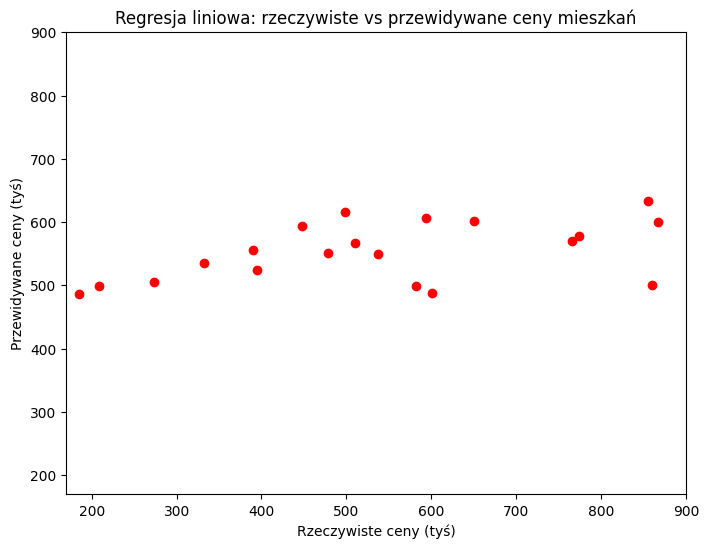

In [36]:
X = appartments_data[['area', 'rooms', 'floor']]
y = appartments_data[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

fig = plt.figure(figsize=(8, 6))

y_test,y_pred = y_test/1000,y_pred/1000


plt.scatter(y_test, y_pred, color='r')
plt.xlabel("Rzeczywiste ceny (tyś)")
plt.ylabel("Przewidywane ceny (tyś)")
plt.xlim(170,900)
plt.ylim(170,900)
plt.title("Regresja liniowa: rzeczywiste vs przewidywane ceny mieszkań")
plt.show()

# Zadanie 4

MSE: 17.454965587646885
R2 Score: 0.6897495070506208


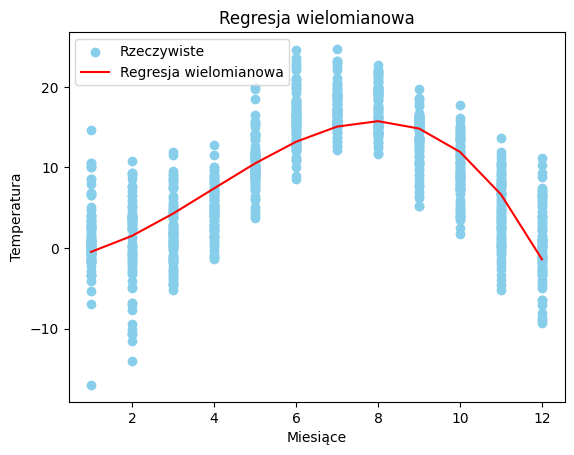

In [37]:
energy_data['month'] = pd.to_datetime(energy_data['time_n']).dt.month

X_train, X_test, y_train, y_test = train_test_split(energy_data['month'], energy_data['temperature'], test_size=0.2, random_state=0)

X_train = X_train.values.reshape(-1, 1) 
X_test = X_test.values.reshape(-1, 1)


poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

plt.scatter(energy_data['month'], energy_data['temperature'], color='skyblue', label='Rzeczywiste')
plt.plot(np.sort(energy_data['month'], axis=0), model.predict(poly.transform(np.sort(energy_data['month'].to_frame(), axis=0))), color='red', label='Regresja wielomianowa')
plt.xlabel("Miesiące")
plt.ylabel("Temperatura")
plt.title("Regresja wielomianowa")
plt.legend()
plt.show()

# Zadanie 5

Ridge (alpha=1) - MSE: 2226524.9385746373, R2: 0.3976642881543224
Lasso (alpha=0.1) - MSE: 2226496.318061127, R2: 0.39767203078369073
Linear Regression - MSE: 2226492.3655241104, R2: 0.3976731000527369


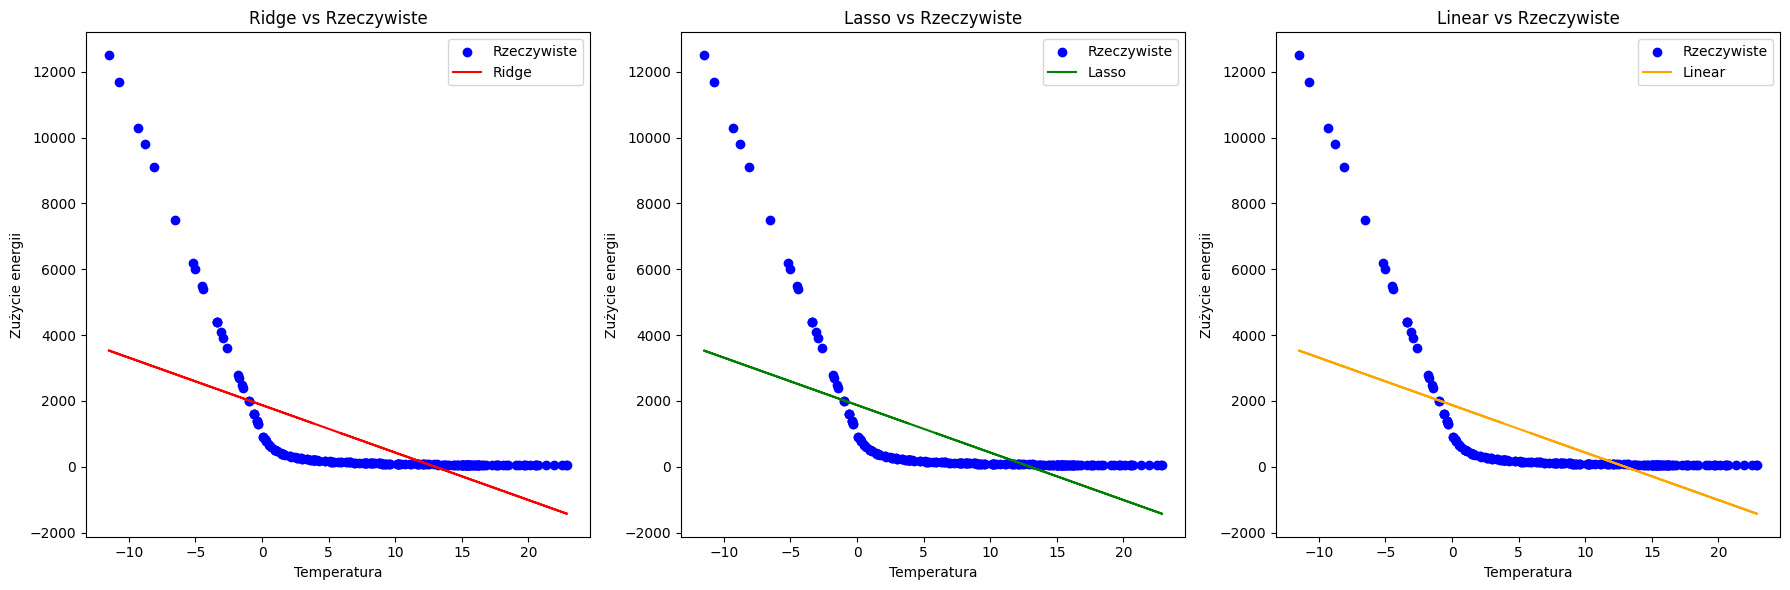

In [38]:
X = energy_data['temperature']  
y = energy_data['energy_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train.to_frame()
X_test = X_test.to_frame()

models = {
    "Ridge (alpha=1)": Ridge(alpha=5),
    "Lasso (alpha=0.1)": Lasso(alpha=0.1),
    "Linear Regression": LinearRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].scatter(X_test, y_test, color='blue', label='Rzeczywiste')
axs[0].plot(X_test, models["Ridge (alpha=1)"].predict(X_test), color='red', label='Ridge')
axs[0].set_title("Ridge vs Rzeczywiste")
axs[0].set_xlabel("Temperatura")
axs[0].set_ylabel("Zużycie energii")
axs[0].legend()

axs[1].scatter(X_test, y_test, color='blue', label='Rzeczywiste')
axs[1].plot(X_test, models["Lasso (alpha=0.1)"].predict(X_test), color='green', label='Lasso')
axs[1].set_title("Lasso vs Rzeczywiste")
axs[1].set_xlabel("Temperatura")
axs[1].set_ylabel("Zużycie energii")
axs[1].legend()

axs[2].scatter(X_test, y_test, color='blue', label='Rzeczywiste')
axs[2].plot(X_test, models["Linear Regression"].predict(X_test), color='orange', label='Linear')
axs[2].set_title("Linear vs Rzeczywiste")
axs[2].set_xlabel("Temperatura")
axs[2].set_ylabel("Zużycie energii")
axs[2].legend()

plt.tight_layout()
plt.show()

# Zadanie 6

SVR (linear) - MSE: 11.734337198483843, R2: 0.650762734458024
SVR (rbf) - MSE: 23.863958467524146, R2: 0.2897610270410287
SVR (poly) - MSE: 10.574704580854332, R2: 0.685275712699909
SVR (lin3) - MSE: 11.623536064022343, R2: 0.6540603970838503
Regresja liniowa - MSE: 10.91273918115489 R2 Score: 0.6752151291773223
Regresja wielomianowa - MSE: 68.56281631373537 R2 Score: -1.0405660824507024


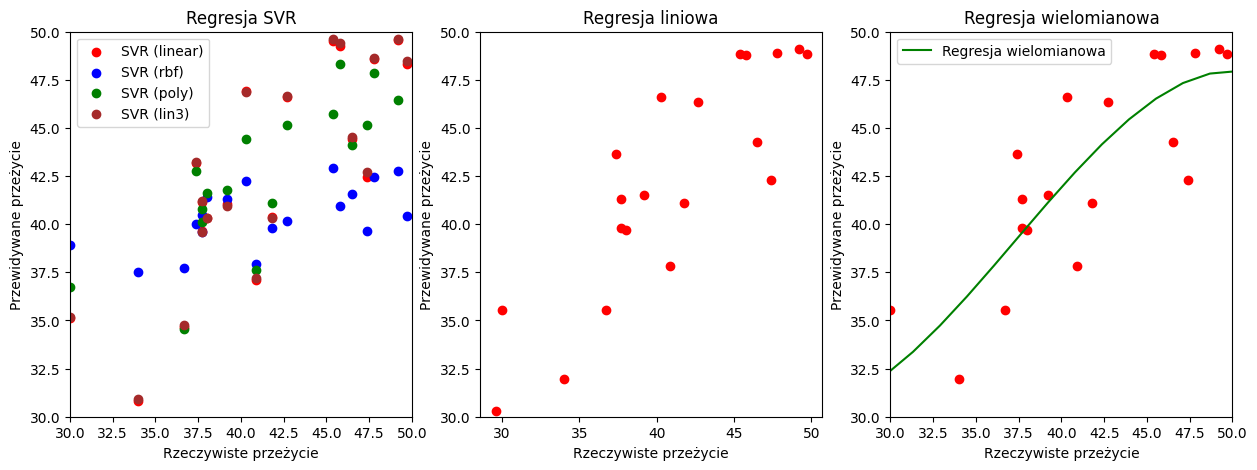

In [39]:
X = medical_data[['wiek','BMI','cisnienie_krwi',"poziom_glukozy",'cholesterol','kretynina']] 
y = medical_data['czas_przezycia']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = {
    "SVR (linear)": SVR(kernel='linear', C=1.0),
    "SVR (rbf)": SVR(kernel='rbf', C=1.0, gamma='scale'),
    "SVR (poly)": SVR(kernel='poly', C=1.0),
    "SVR (lin3)": SVR(kernel='linear', C=5.0,  gamma='scale')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

colors = ['r','b','g','brown']
for (name, model), color in zip(models.items(), colors):
    axs[0].scatter(y_test, model.predict(X_test), color=color, label=name)
    
axs[0].set_xlabel("Rzeczywiste przeżycie")
axs[0].set_ylabel("Przewidywane przeżycie")
axs[0].set_title("Regresja SVR")
axs[0].set_xlim(30,50)
axs[0].set_ylim(30,50)
axs[0].legend()

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Regresja liniowa - MSE:", mean_squared_error(y_test, y_pred),"R2 Score:", r2_score(y_test, y_pred))


axs[1].scatter(y_test, y_pred, color='r')
axs[2].set_xlim(30,50)
axs[1].set_ylim(30,50)
axs[1].set_xlabel("Rzeczywiste przeżycie")
axs[1].set_ylabel("Przewidywane przeżycie")
axs[1].set_title("Regresja liniowa")


x_poly = np.linspace(25, 55, len(X_test))
y_poly = np.polyval(np.polyfit(y_test, y_pred, 3), x_poly)
mse_poly = mean_squared_error(y_test, y_poly)
r2_poly = r2_score(y_test, y_poly)

print("Regresja wielomianowa - MSE:", mse_poly, "R2 Score:", r2_poly)

axs[2].plot(x_poly, y_poly, color='g', label='Regresja wielomianowa')
axs[2].scatter(y_test, y_pred, color='r')
axs[2].set_xlim(30,50)
axs[2].set_ylim(30,50)
axs[2].set_xlabel("Rzeczywiste przeżycie")
axs[2].set_ylabel("Przewidywane przeżycie")
axs[2].set_title("Regresja wielomianowa")
axs[2].legend()

plt.show()

Oceniajac na podstwie MSE i R2, najlepsze wyniki daje nam SVR z jądrem wielomianowym (poly).